![](https://joealves.com/wp-content/uploads/2017/12/yelp-logo-22.png)

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Loading Libraries</a>
- <a href='#3'>3. Retrieving the Data</a>
    - <a href='#3.1'>3.1 Original data sets</a>
    - <a href='#3.2'>3.2 Toronto Restaurants, Reviews and Users Only</a>
- <a href='#4'>4. First look at Data</a>
- <a href='#5'>5. Check for missing data</a>
- <a href='#6'>6. Data Exploration</a>
    - <a href='#6.1'>6.1 Distribution of ratings</a>
    - <a href='#6.2'>6.2 Categories within Restaurants</a>
    - <a href='#6.3'>6.3 User Information</a>

# <a id='1'>1. Introduction</a>

Exploratory Data Analysis of the Yelp dataset for use as a proof-of-concept for Reviewly, with the goal of weighting reviews from reviewers that have more in common with the Reviewly user.

 # <a id='2'>2. Loading Libraries</a>

In [1]:
# Basics
import numpy as np # fundamental package for scientific computing with Python
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis

# To list, read and write files to the operating system
import os

# Visualization
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn 
import matplotlib.gridspec as gridspec 

# Regular Expressions
import re

# Settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

import time
start_time=time.time()

color = sns.color_palette()
# pyo.init_notebook_mode()

%matplotlib inline

 # <a id='3'>3. Retrieving the Data</a>

In [2]:
print(os.listdir("./dataset"))

['._Dataset_Challenge_Dataset_Agreement.pdf', '._Yelp_Dataset_Challenge_Round_11.pdf', 'business.json', 'checkin.json', 'Dataset_Challenge_Dataset_Agreement.pdf', 'PaxHeader', 'photos.json', 'res_reviews-20180723-211224.csv', 'review.json', 'tip.json', 'Tor_restaurants.csv', 'Tor_res_reviews.csv', 'Tor_res_users.csv', 'user.json', 'Yelp_Dataset_Challenge_Round_11.pdf']


 # <a id='3.1'>3.1. Original data sets</a>

In [3]:
#import every dataset
start_time=time.time()
business = pd.read_json("./dataset/business.json", lines=True)
check_in=pd.read_json("./dataset/checkin.json", lines=True)
reviews=pd.read_json("./dataset/review.json", lines=True)
tip=pd.read_json("./dataset/tip.json", lines=True)
user=pd.read_json("./dataset/user.json", lines=True)
end_time=time.time()
print("Took",end_time-start_time,"s")


Took 152.7984230518341 s


### Focusing on restaurants

In [4]:
# Create a dataframe for restaurants
business['categories'] = business['categories'].astype(str)
restaurants = business[business['categories'].str.contains("Restaurant")]

In [5]:
"""
timestr = time.strftime("%Y%m%d-%H%M%S")
restaurants.to_csv('restaurants-' + timestr + '.csv',index=False)
"""

'\ntimestr = time.strftime("%Y%m%d-%H%M%S")\nrestaurants.to_csv(\'restaurants-\' + timestr + \'.csv\',index=False)\n'

### Location of the ratings

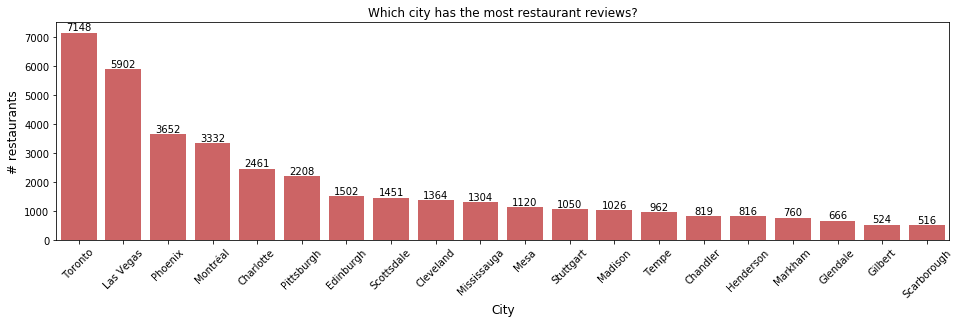

In [6]:
x = restaurants['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most restaurant reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Plot popularity within cities

In [7]:
#get all ratings data
rating_data = restaurants[['latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars * no_of_reviews
rating_data['popularity'] = rating_data['stars'] * rating_data['review_count']

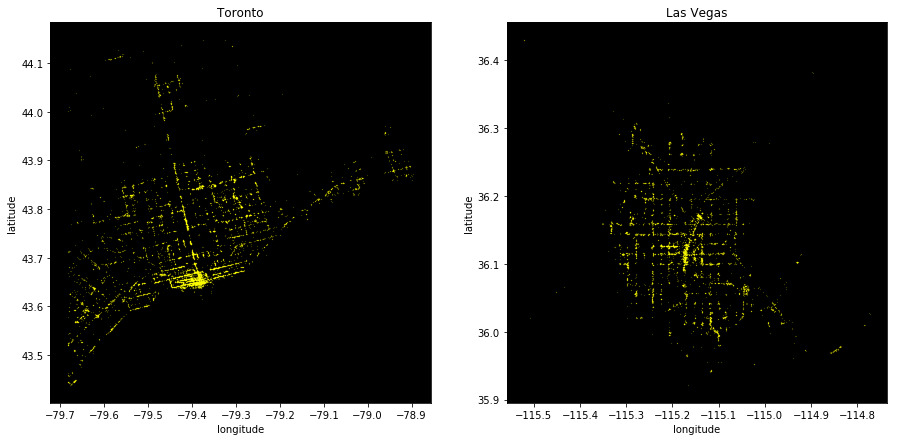

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside Toronto
lat = 43.6532
lon = -79.3832
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Toronto")
ax1.set_facecolor('black')
f.show()

#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Las Vegas")
ax2.set_facecolor('black')



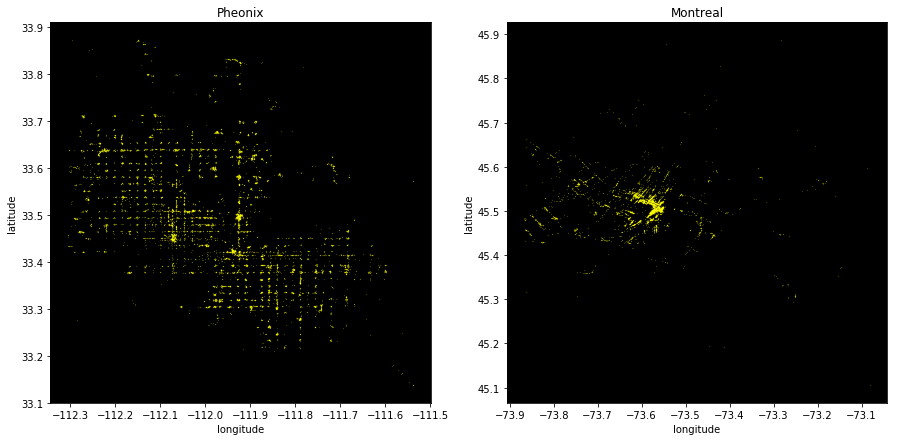

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

#a random point inside pheonix
lat = 33.435463
lon = -112.006989
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pheonix")
ax1.set_facecolor('black')
f.show()

#a random point inside Montreal
lat = 45.5017
lon = -73.5673
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for pheonix
ratings_data_pheonix=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]
#plot pheonix
ratings_data_pheonix.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Montreal")
ax2.set_facecolor('black')
f.show()

 # <a id='3.2'>3.2. Toronto Restaurants, Reviews and Users Only</a>

The following cells filtered the source datasets to isolate the Toronto restaurant data. For the sake of time, that data will be reloaded directly from csv rather than filtering the existing data sets.

In [10]:
"""
# Toronto Restaurants
restaurants['city'] = restaurants['city'].astype(str)
Tor_restaurants = restaurants[restaurants['city'].str.contains("Toronto")]
Tor_restaurants['popularity'] = Tor_restaurants['stars'] * Tor_restaurants['review_count'] # Add popularity feature
"""

'\n# Toronto Restaurants\nrestaurants[\'city\'] = restaurants[\'city\'].astype(str)\nTor_restaurants = restaurants[restaurants[\'city\'].str.contains("Toronto")]\n'

In [11]:
"""
timestr = time.strftime("%Y%m%d-%H%M%S")
Tor_restaurants.to_csv('Tor_restaurants-' + timestr + '.csv',index=False, encoding = 'utf-8')
"""

'\ntimestr = time.strftime("%Y%m%d-%H%M%S")\nTor_restaurants.to_csv(\'Tor_restaurants-\' + timestr + \'.csv\',index=False)\n'

In [12]:
"""
# Reviews
start_time=time.time()
Tor_res_reviews = res_reviews[res_reviews['business_id'].isin(Tor_restaurants['business_id'])]
end_time=time.time()
print("Took",end_time-start_time,"s")
"""

'\n# Reviews\nstart_time=time.time()\nTor_res_reviews = res_reviews[res_reviews[\'business_id\'].isin(Tor_restaurants[\'business_id\'])]\nend_time=time.time()\nprint("Took",end_time-start_time,"s")\n'

In [13]:
"""
timestr = time.strftime("%Y%m%d-%H%M%S")
Tor_res_reviews.to_csv('Tor_res_reviews-' + timestr + '.csv',index=False, encoding = 'utf-8')
"""

'\ntimestr = time.strftime("%Y%m%d-%H%M%S")\nTor_res_reviews.to_csv(\'Tor_res_reviews-\' + timestr + \'.csv\',index=False)\n'

In [14]:
"""
# Users
start_time=time.time()
Tor_res_users = user[user['user_id'].isin(Tor_res_reviews['user_id'])]
end_time=time.time()
print("Took",end_time-start_time,"s")
"""

'\n# Users\nstart_time=time.time()\nTor_res_users = user[user[\'user_id\'].isin(Tor_res_reviews[\'user_id\'])]\nend_time=time.time()\nprint("Took",end_time-start_time,"s")\n'

In [15]:
"""
timestr = time.strftime("%Y%m%d-%H%M%S")
Tor_res_users.to_csv('Tor_res_users-' + timestr + '.csv',index=False, encoding = 'utf-8')
"""

'\ntimestr = time.strftime("%Y%m%d-%H%M%S")\nTor_res_users.to_csv(\'Tor_res_users-\' + timestr + \'.csv\',index=False)\n'

In [16]:
Tor_restaurants = pd.read_csv('./dataset/Tor_restaurants.csv')

In [17]:
Tor_res_reviews = pd.read_csv('./dataset/Tor_res_reviews.csv')

In [18]:
Tor_res_users = pd.read_csv('./dataset/Tor_res_users.csv')

# <a id='4'>4. First look at Data</a>

**Restaurants**

In [39]:
Tor_restaurants.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,popularity
0,2459 Yonge St,"{'GoodForMeal': {'dessert': False, 'latenight'...",l09JfMeQ6ynYs5MCJtrcmQ,"['Italian', 'French', 'Restaurants']",Toronto,"{'Monday': '9:00-22:00', 'Tuesday': '9:00-22:0...",0,43.711399,-79.399339,Alize Catering,Yonge and Eglinton,M4P 2H6,12,3.0,ON,36.0
1,1058 Gerrard Street E,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",1K4qrnfyzKzGgJPBEcJaNQ,"['Tiki Bars', 'Nightlife', 'Mexican', 'Restaur...",Toronto,"{'Monday': '11:30-2:00', 'Tuesday': '11:30-2:0...",1,43.669256,-79.335902,Chula Taberna Mexicana,Leslieville,M4M 3A6,39,3.5,ON,136.5
2,2777 Steeles Avenue W,"{'GoodForMeal': {'dessert': False, 'latenight'...",nbhBRhZtdaZmMMeb2i02pg,"['Restaurants', 'Breakfast & Brunch']",Toronto,"{'Monday': '7:00-15:00', 'Tuesday': '7:00-15:0...",1,43.781816,-79.490433,Sunnyside Grill,NaN,M3J 3K5,3,5.0,ON,15.0
3,201 Harbord Street,"{'BusinessParking': {'garage': False, 'street'...",FXHfcFVEfI1vVngW2gVOpw,"['Coffee & Tea', 'Restaurants', 'Food', 'Medit...",Toronto,"{'Monday': '17:00-23:00', 'Tuesday': '11:00-23...",1,43.661582,-79.408878,Bampot House of Tea & Board Games,NaN,M5S 1H6,55,4.0,ON,220.0
4,4700 Keele Street,"{'RestaurantsTableService': False, 'GoodForMea...",VXH7zXcZzXlmAVN8GSjGRQ,"['Imported Food', 'Specialty Food', 'Thai', 'E...",Toronto,"{'Monday': '10:00-23:00', 'Tuesday': '10:00-23...",1,43.774878,-79.494619,Thai Express,NaN,M3J 1P3,5,3.0,ON,15.0


**Reviews**

In [21]:
Tor_res_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,9_CGhHMz8698M9-PkVf0CQ,2,2012-05-11,0.0,ymAUG8DZfQcFTBSOiaNN4w,4.0,Who would have guess that you would be able to...,0.0,u0LXt3Uea_GidxRW1xcsfg
1,5r6-G9C4YLbC7Ziz57l3rQ,0,2013-02-09,0.0,w41ZS9shepfO3uEyhXEWuQ,3.0,"Not bad!! Love that there is a gluten-free, ve...",1.0,u0LXt3Uea_GidxRW1xcsfg
2,z8oIoCT1cXz7gZP5GeU5OA,0,2013-05-01,0.0,PIsUSmvaUWB00qv5KTF1xA,4.0,This is currently my parents new favourite res...,1.0,u0LXt3Uea_GidxRW1xcsfg
3,XWTPNfskXoUL-Lf32wSk0Q,1,2011-09-28,0.0,PdZ_uFjbbkjtm3SCY_KrZw,3.0,Server was a little rude.\r\r\n\r\r\nOrdered t...,5.0,u0LXt3Uea_GidxRW1xcsfg
4,RtUvSWO_UZ8V3Wpj0n077w,1,2012-12-03,1.0,lsoSqIrrDbQvWpMvsSj2xw,3.0,Wanted to check out this place due to all the ...,2.0,u0LXt3Uea_GidxRW1xcsfg


**Users**

In [22]:
Tor_res_users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],1,Susan,1,3,LdqGHXsNQowMrvgTNburJA,2013-09-29
1,3.50,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Dan,2,0,WQxXdek5tWFZSPg_GKn1FQ,2015-03-22
2,2.00,0,0,0,0,0,0,1,0,1,0,0,0,[],0,[],2,Ella,4,5,1iIebpwPVifig9Xi0EI8Dg,2015-05-18
3,4.36,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Heaton,9,0,soTbfMymlIGp9nTLiYKtxQ,2013-10-04
4,5.00,0,0,0,0,0,0,0,0,0,0,0,0,[],0,[],0,Muhannad,1,0,mE1lhDaVawNB-yhV0DfyFQ,2016-07-23


# <a id='5'> 5. Check for missing data</a>

In [23]:
# checking missing data
total = Tor_restaurants.isnull().sum().sort_values(ascending = False)
percent = (Tor_restaurants.isnull().sum()/Tor_restaurants.isnull().count()*100).sort_values(ascending = False)
missing_restaurants_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_restaurants_data.head(20)

,Total,Percent
neighborhood,1258,17.596867
address,20,0.279759
postal_code,17,0.237795
state,0,0.000000
stars,0,0.000000
review_count,0,0.000000
name,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
is_open,0,0.000000


# <a id='6'>6. Data Exploration</a>

 # <a id='6.1'>6.1. Distribution of ratings</a>

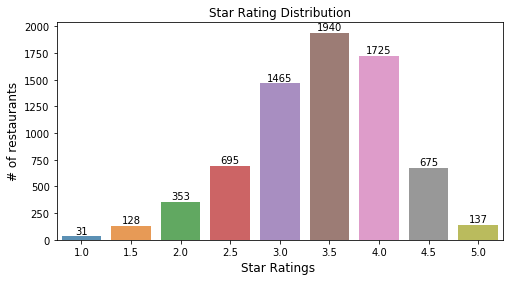

In [24]:
x = Tor_restaurants['stars'].value_counts()
x = x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of restaurants', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

 # <a id='6.2'>6.2. Categories within Restaurants</a>

There are  324  different types/categories of Restaurants in Yelp!


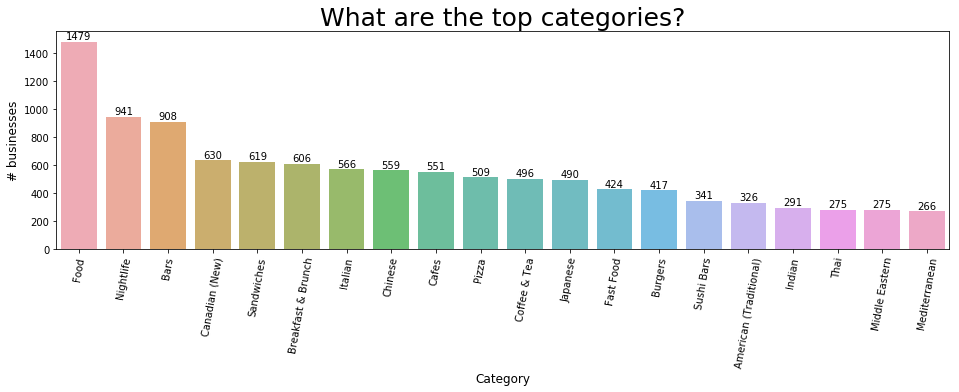

In [33]:
import re
# What are the popular business categories?
business_cats = ' '.join(Tor_restaurants['categories'])
business_cats = business_cats.replace(']', ',')
business_cats = re.sub(r' \[', '',business_cats)
business_cats = re.sub(r" \'", '',business_cats)
business_cats = business_cats.replace("'", '')
business_cats = business_cats.replace("[", '')
cats = pd.DataFrame(business_cats.split(','),columns=['category'])
cats = cats[cats.category != 'Restaurants'] #Remove "Restaurants"
x = cats.category.value_counts()
print("There are ",len(x)," different types/categories of Restaurants in Yelp!")
#prep for chart
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

 # <a id='6.3'>6.3. User Information</a>

In [34]:
user_agg = Tor_res_reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [28]:
user_agg = user_agg.sort_values([('review_id','count')],ascending = False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id        date              useful   funny  \
                           count         min         max     sum     sum   
user_id                                                                    
CxDOIDnH8gp9KXzpBHJYXw       884  2009-11-09  2017-12-02  2873.0  1448.0   
Q9mA60HnY87C1TW5kjAZ6Q       445  2011-05-30  2017-12-06  2410.0  1431.0   
TbhyP24zYZqZ2VJZgu1wrg       401  2010-03-17  2015-12-18  1373.0   663.0   
0BBUmH7Krcax1RZgbH4fSA       361  2010-03-18  2017-01-26   913.0   352.0   
FREeRQtjdJU83AFtdETBBw       350  2014-01-10  2017-11-29   262.0    74.0   
1fNQRju9gmoCEvbPQBSo7w       334  2013-02-24  2017-12-07   182.0    88.0   
tWBLn4k1M7PLBtAtwAg73g       316  2010-11-08  2017-11-29   252.0    66.0   
yT_QCcnq-QGipWWuzIpvtw       302  2011-03-24  2017-11-08   540.0   180.0   
V4TPbscN8JsFbEFiwOVBKw       297  2010-02-19  2017-07-17   597.0   185.0   
O3pSxv1SyHpY4qi4Q16KzA       296  2010-07-07  2017-12-05   232.0    58.0   

                        cool     stars  
                         sum      mean  
user_id                                 
CxDOIDnH8gp9KXzpBHJYXw  1769  3.229638  
Q9mA60HnY87C1TW5kjAZ6Q  1938  3.952809  
TbhyP24zYZqZ2VJZgu1wrg   813  3.436409  
0BBUmH7Krcax1RZgbH4fSA   576  3.562327  
FREeRQtjdJU83AFtdETBBw   226  4.205714  
1fNQRju9gmoCEvbPQBSo7w    56  3.023952  
tWBLn4k1M7PLBtAtwAg73g    98  3.500000  
yT_QCcnq-QGipWWuzIpvtw   321  3.443709  
V4TPbscN8JsFbEFiwOVBKw   366  3.414141  
O3pSxv1SyHpY4qi4Q16KzA    97  3.273649

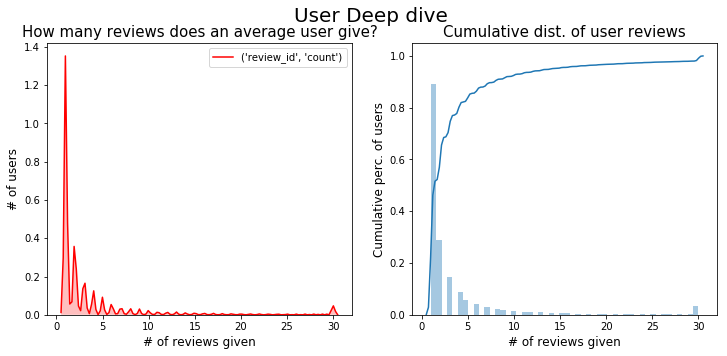

Took 412.1407253742218 s


In [29]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

Resources
* https://www.kaggle.com/jagangupta/what-s-in-a-review-yelp-ratings-eda